## Relatório Final de Projeto

Integrantes: Emyle Santos, João Victor e Júlia Gabriele

Este projeto apresenta uma análise detalhada dos dados do **RREO** (Relatório Resumido da Execução Orçamentária), focando na interpretação e estudo de dados financeiros e orçamentários reportados pela entidade no primeiro bimestre de 2021 a 2023. Os dados foram fornecidos pela SINCONF (Supervisão de Controle Interno e Financeiro) e têm como objetivo fornecer insights sobre aspectos financeiros no Brasil durante esse período.

Os objetivos deste projeto são:

- Analisar as principais fontes de receita da entidade: Identificar e estudar as fontes de receita mais relevantes da entidade nos anos de 2021, 2022 e 2023, visando **entender as variações e tendências** ao longo desse período.

- Avaliar o comportamento das despesas: Realizar uma análise detalhada das despesas totais da entidade em cada ano, destacando as **categorias de despesa** mais significativas e suas variações.

- Examinar os principais investimentos: Identificar os principais investimentos realizados pela entidade durante o primeiro bimestre dos anos de 2021, 2022 e 2023, buscando avaliar seu impacto no **contexto financeiro.**

Afim de serem respondidas as seguintes perguntas: 
- Quais foram as principais fontes de receita da entidade nos anos de 2021, 2022 e 2023?
- Quais foram as receitas correntes da Prefeitura Municipal de João Pessoa no período analisado?
- Há relação entre o tamanho da população e o valor das receitas obtidas em cada ano?

## Exploração Inicial

In [ ]:
%pip install pandas matplotlib numpy seaborn scikit-learn 

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [123]:
caminho_dados = 'dados/dados_totais.csv'

dataset = pd.read_csv(caminho_dados, encoding="utf-8")

dataset.head()

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"781,983,935.78"
1,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"268,827,201.57"
2,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"149,122,846.84"
3,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"82,253,889.17"
4,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"8,944,698.43"


In [124]:
# Criando uma copia do dataset para não modificar o original
dataset_copia = dataset.copy()

In [125]:
# Descrição estatística dos dados
dataset_copia.describe()

,Ano,População,Valor
count,"30,209.00","30,209.00","30,209.00"
mean,"2,021.98","1,891,847.88","375,508,189.15"
std,0.82,"2,528,806.94","2,490,792,141.93"
min,"2,021.00","306,296.00","-64,925,679.27"
25%,"2,021.00","548,952.00","5,250,070.54"
50%,"2,022.00","1,031,597.00","27,088,756.10"
75%,"2,023.00","1,963,726.00","144,153,327.77"
max,"2,023.00","12,396,372.00","86,570,289,142.11"


Analisando a descrição estatísca, podemos retirar algumas informações sobre os dados:

*1*- Na coluna 'Ano', temos tres valores 2022, 2023, 2024, que correspondem aos anos que os dados foram retirados       
    1.1- A mediana é 2022, o que significa que metade dos dados correspondem ao ano de 2022

*2*- Na coluna 'População', a média é na casa dos milhões, sugerindo que os dados estão em uma escala grande        
    2.1- O desvio padrão de 2.528.807 sugere uma alta variação, com valores que se espalham amplamente em torno da média.

*3*- Na coluna 'Valor', a média também é um valor bem alto (na casa de centenas de milhões), o que sugere a alta escala de valores tambem.      
    3.1- Analisando o valor min e max, notamos a existência de valores negativos nos dados, o que faz sentido, levando em consideração
que a coluna traz informações sobre os pagamentos de contas.

In [126]:
# Vamos visualizar melhor as linhas referentes aos valores negativos da coluna "valor"
df_valores_negativos = dataset_copia[dataset_copia['Valor'] < 0]

df_valores_negativos

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
492,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-632,793.00"
535,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,Outras Receitas Patrimoniais,siconfi-cor_OutrasReceitasPatrimoniais,"-39,174.87"
582,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-596,107.00"
961,2021,Prefeitura Municipal de Fortaleza - CE,CE,2703391,(-) Transferências obrigatórias da União relat...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-33,604.00"
1049,2021,Prefeitura Municipal de Fortaleza - CE,CE,2703391,(-) Transferências obrigatórias da União relat...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-300,000.00"
...,...,...,...,...,...,...,...
28430,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,"-1,629,428.92"
28455,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,"-1,927,275.69"
28456,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,"-1,994,966.02"
28481,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,"-68,776.42"


    Esses valores negativos podem indicar ajustes contábeis, como devoluções de transferências obrigatórias, correções em receitas e despesas, e situações de déficit orçamentário, onde despesas superam receitas previstas. 

## Pré-processamento de dados

No notebook *limpezadedados.ipynb* foi feita uma limpeza de dados em que foram retiradas colunas como: "Cod.IBGE" e "Coluna", para melhor visualização e dados desnecessários. Após isso, os dados ficaram assim:

In [127]:
dataset_copia

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"781,983,935.78"
1,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"268,827,201.57"
2,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"149,122,846.84"
3,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"82,253,889.17"
4,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"8,944,698.43"
...,...,...,...,...,...,...,...
30204,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,"11,019,574.00"
30205,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,"141,564,612.00"
30206,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"2,747,357,901.85"
30207,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"2,747,357,901.85"


Vamos formatar a coluna "Valor" para que seja fácil a sua leitura

In [128]:
pd.options.display.float_format = '{:,.2f}'.format

In [129]:
dataset_copia.describe()

,Ano,População,Valor
count,"30,209.00","30,209.00","30,209.00"
mean,"2,021.98","1,891,847.88","375,508,189.15"
std,0.82,"2,528,806.94","2,490,792,141.93"
min,"2,021.00","306,296.00","-64,925,679.27"
25%,"2,021.00","548,952.00","5,250,070.54"
50%,"2,022.00","1,031,597.00","27,088,756.10"
75%,"2,023.00","1,963,726.00","144,153,327.77"
max,"2,023.00","12,396,372.00","86,570,289,142.11"


## Perguntas

### Pergunta 1

Quais foram as principais fontes de receita da entidade nos anos escolhidos?

In [130]:
# Vamos visualizar melhor as linhas referentes as contas de valor maiores que 250000000 que corresponde a mais que o terceiro quartil de "Valor"
df_valores_maiores = dataset_copia[dataset_copia['Valor'] > 14415332777]

df_valores_maiores

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
3239,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"15,033,442,777.23"
3271,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"15,816,114,620.00"
3297,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"14,578,030,747.00"
3298,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"14,578,030,747.00"
3299,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"14,578,030,747.00"
...,...,...,...,...,...,...,...
27069,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"23,576,189,975.06"
27070,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"25,370,523,500.00"
27096,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"23,472,288,069.00"
27097,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"23,472,288,069.00"


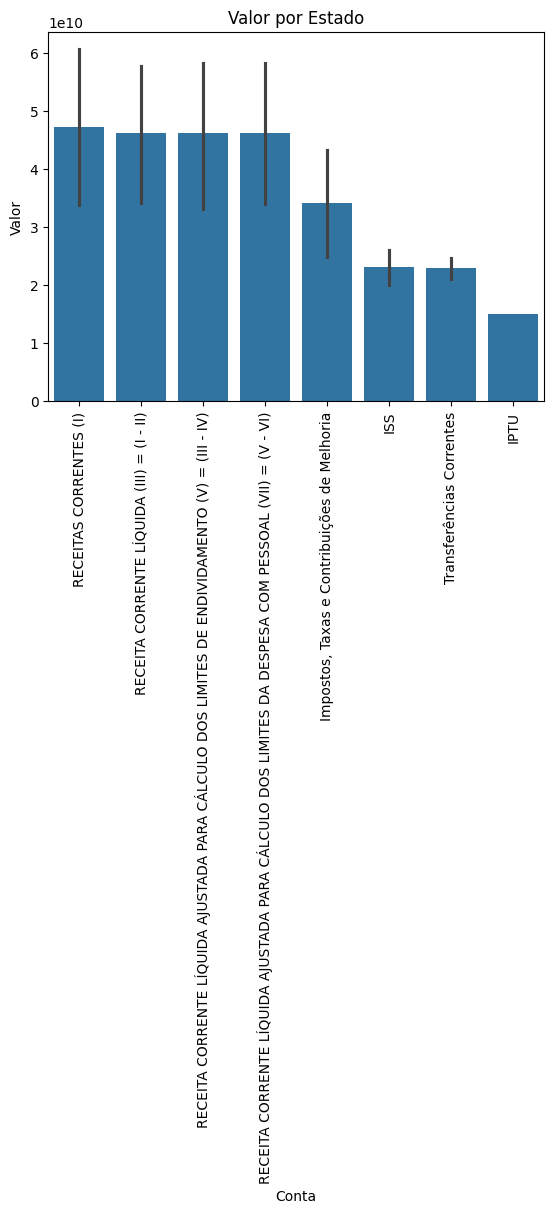

In [131]:
df_valores_maiores = df_valores_maiores.sort_values(by='Valor', ascending=False)

sns.barplot(x='Conta', y='Valor', data=df_valores_maiores)
plt.title('Valor por Estado')
plt.xlabel('Conta')
plt.ylabel('Valor')
plt.xticks(rotation=90)  
plt.show()

Analisando o gráfico Valor x Coluna, podemos perceber que as contas com maior valor é:
- Receitas correntes(I)
- Receitas correntes líquidas (III)
- Receita corrente líquida ajustada para cálculo dos limites da despesa com pessoal (VII)
- Receita corrente líquida ajustada para cálculo dos limites de endividamente (V)
- Impostos taxas e contribuícoes de melhorias
- ISS
- Transferências correntes
- IPTU

Porque essas contas se destacam mais? 

A receita corrente refere-se a todas as receitas que o governo arrecadou, incluindo tributos, taxas, contribuições, etc.
É com esse dinheiro que o governo financia despesas correntes, como salários, manutenção de serviços e pagamento de dividas. Então, de fato, espera-se que ela possua altos valores.

As receitas correntes líquidas são obtidas após a dedução de devoluções e restituições das receitas correntes totais. Ela é importante, pois representa a quantia efetivamente disponível para o governo financiar suas despesas e investimentos.

A receita corrente líquida ajustada para cálculo dos limites da despesa com pessoal: Essa receita ajustada é importante para garantir que as despesas com pessoal não excedam os limites estabelecidos pela Lei de Responsabilidade Fiscal (LRF). Por isso que ela está entre as com maiores valores.

A receita corrente líquida ajustada para cálculo dos limites de endividamento, semelhante à conta anterior, ajuda a monitorar e controlar o endividamento público. Manter a dívida dentro dos limites legais é essencial para a saúde financeira do governo e para evitar crises fiscais.

Impostos, taxas e contribuições de melhoria representam a principal fonte de arrecadação do governo. Impostos são a base da arrecadação, enquanto taxas e contribuições garantem que os serviços públicos sejam financiados de acordo com o uso e benefício proporcionado aos cidadãos. Dessa forma, essa conta está muito relacionada à receita corrente.

ISS (Imposto Sobre Serviços) e o IPTU: são importantes fontes de receita para os municípios, refletindo a atividade econômica local. Com a urbanização crescente, espera-se que esses impostos tenha altos valores, pois está diretamente ligado à prestação de serviços na área urbana.

As Transferências correntes garantem que estados e municípios possam financiar programas essenciais. Essas transferências são críticas para a manutenção de serviços públicos, o que explica sua presença no gŕafico.


### Pergunta 2

Qual foi a tendência dos valores (receitas ou despesas) ao longo dos anos para a Prefeitura de João Pessoa?

In [132]:
df_jp = dataset_copia[dataset_copia['UF'] == "PB"]

df_jp

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
6100,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"329,157,559.17"
6101,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"141,855,425.52"
6102,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"61,379,216.02"
6103,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"25,883,646.94"
6104,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"13,834,636.34"
...,...,...,...,...,...,...,...
27851,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,"12,000,000.00"
27852,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,"170,066,000.00"
27853,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"2,866,817,603.00"
27854,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"2,866,817,603.00"


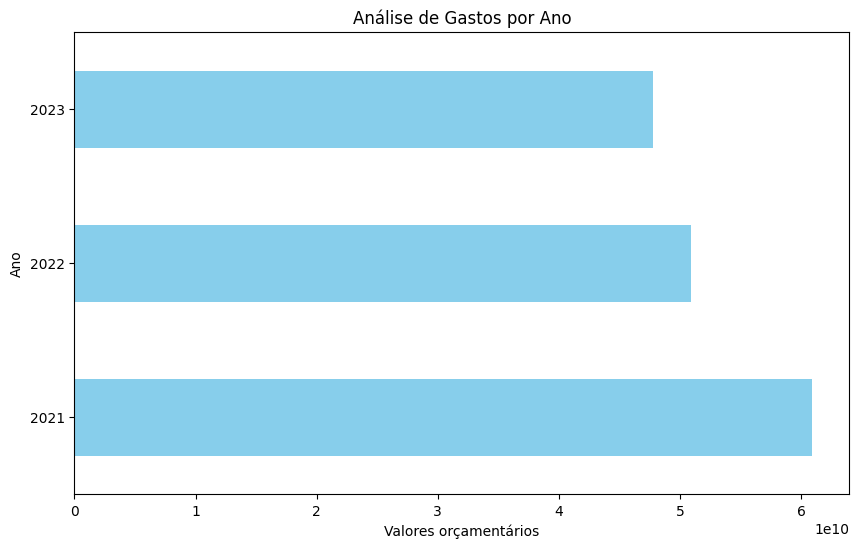

In [133]:
# Vamos agrupar os valores por "Ano" e somar os valores correspondentes
gastos_por_ano = df_jp.groupby('Ano')['Valor'].sum()


plt.figure(figsize=(10, 6))
gastos_por_ano.plot(kind='barh', color='skyblue')


plt.title('Análise de Gastos por Ano')
plt.xlabel('Valores orçamentários')
plt.ylabel('Ano')


plt.show()

>Analisando o gráfico, observamos que 2021 se destacou pelo aumento significativo das receitas e despesas. Esse crescimento reflete uma combinação de fatores fundamentais, como a recuperação econômica após os desafios impostos pela pandemia, as transferências governamentais direcionadas a apoiar os municípios, os investimentos em infraestrutura e a implementação de uma gestão fiscal eficiente. Esses elementos interligados foram determinantes para os altos valores registrados nesse ano.

### Pergunta 3

 Há relação entre o tamanho da população e o valor das receitas obtidas em cada ano?

In [134]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

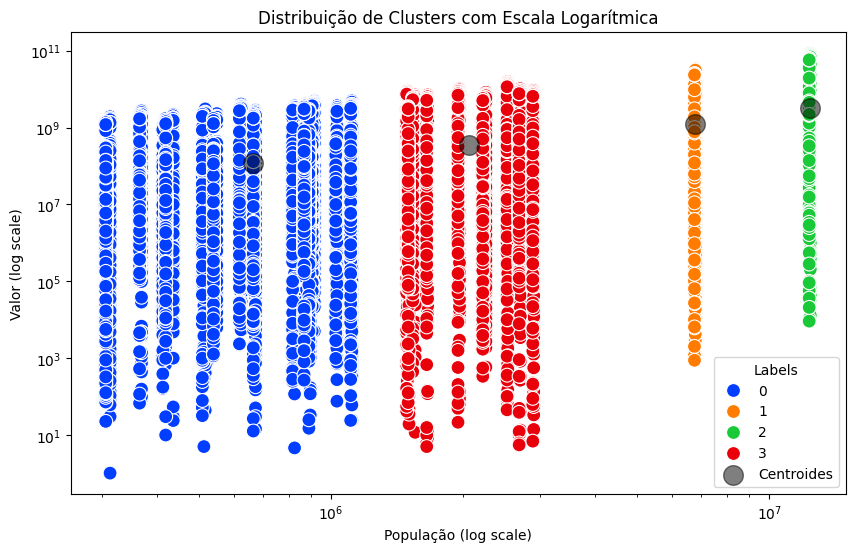

In [120]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset_copia[['População', 'Valor']])

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(dataset_scaled)
dataset_copia['labels'] = kmeans.labels_

centroides = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_copia, x='População', y='Valor', hue='labels', palette='bright', s=100)
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5, label='Centroides') #definimos visualmente os centróides para podermos ver onde eles realmente estão

plt.xscale('log')
plt.yscale('log')

plt.xlabel('População (log scale)')
plt.ylabel('Valor (log scale)')
plt.legend(title='Labels')
plt.title('Distribuição de Clusters com Escala Logarítmica')
plt.show()


> Apesar do gráfico do joelho nos mostrar que a melhor escolha é k=3, optamos por usar k=4 conforme explicamos na fase 4 do projeto.

Observando o gráfico, temos que

- Os Clusters 1 (laranja) e 3 (verde) têm populações maiores e também apresentam receitas mais elevadas e concentradas, o que sugere que há uma tendência de que cidades ou regiões com populações maiores também tenham receitas maiores.
- Os clusters 0 (azul) e 2 (vermelho) abrangem cidades ou regiões com populações menores e maior variação no valor das receitas. Isso pode sugerir que, em populações menores, há mais variabilidade na receita, podendo ser influenciada por outros fatores.

Analisando o gráfico surge a seguinte pergunta: Há relação entre o tamanho da população e o valor das receitas obtidas em cada ano? Por que algumas regiões com pequenas populações apresentam valores elevados de execução orçamentária? Há realmente coerência entre o tamanho populacional e a execução orçamentária?(é contra-intuitivo, devemos analisar melhor!)

 Pensamos na ação de políticas públicas. Regiões podem ter recebido orçamento para a melhoria, por exemplo, da infraestrutura, para a construção de prédios públicos ou até mesmo para auxílios em desastres naturais; E esses fatores podem não estar diretamente ligados ao tamanho da população, mas sim às necessidades dela.

 Por isso, para além de uma análise de dados, para responder essas perguntas, precisamos compreender o contexto socioeconômico e das necessidades da população. Por isso, nem sempre a coluna 'Valor' está associada à coluna 'População'!

## Conclusão

Portanto, nosso grupo analisou as receitas financeiras e populacionais de municípios brasileiros entre 2022 e 2024, utilizando técnicas de análise descritiva e clusterização. Os resultados revelaram uma significativa variabilidade na execução orçamentária e na população dos municípios, evidenciando que não existe uma relação linear clara entre o tamanho populacional e os valores orçamentários. A mudança de k = 3 para k = 4 clusters proporcionou uma segmentação mais refinada, permitindo identificar discrepâncias regionais que podem refletir a implementação de políticas públicas específicas ou projetos de infraestrutura.

Essas descobertas são cruciais para a compreensão da gestão financeira municipal, pois ajudam a identificar perfis distintos e áreas que requerem atenção especial nas políticas públicas. No entanto, o estudo apresenta limitações, como a falta de dados mais detalhados sobre despesas específicas e variáveis socioeconômicas, que poderiam enriquecer a análise e proporcionar uma visão mais aprofundada dos padrões orçamentários.

Para trabalhos futuros, pensamos na inclusão de dados adicionais, como PIB local e indicadores de desenvolvimento humano, para compreendermos melhor as causas das discrepâncias observadas entre população e execução orçamentária. Melhorias na análise de valores negativos e a consideração de fatores contextuais que impactam a execução orçamentária também são áreas promissoras para investigações futuras.